# **FIFA Analysis**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
fifa = pd.read_csv("players_20.csv")

In [ ]:
# 1. Load the csv file and show top 5 records from it. (first 5)
fifa.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [ ]:
# 2. How you would be able to see each column's name.
for column in fifa.columns:
  print(column)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

In [ ]:
# Alt method
pd.set_option('display.max_columns', None)
fifa.head(0)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb


In [ ]:
# 3. Show the number of rows and columns in the dataset.
column = 0
for c in fifa.columns:
  column += 1

row = len(fifa.index)

print(f"There are {column} columns and {row} rows.")


There are 104 columns and 18278 rows.


In [ ]:
# Alt method
print(f"There are {fifa.shape[1]} columns and {fifa.shape[0]} rows.")

There are 104 columns and 18278 rows.


In [ ]:
# 4. Show number of players in each country.
countries = fifa.groupby("nationality")[["sofifa_id"]].count()
countries = countries.rename(columns = {"sofifa_id": "player_count"})
countries.index.names = ["country"]
countries

,player_count
country,
Afghanistan,2
Albania,43
Algeria,50
Angola,16
Antigua & Barbuda,7
...,...
Venezuela,66
Vietnam,1
Wales,117


In [ ]:
# 5. Show the top 10 countries with the highest amount of players.
countries = countries.sort_values(by = ["player_count"], ascending = False)
countries.head(10)

,player_count
country,
England,1667
Germany,1216
Spain,1035
France,984
Argentina,886
Brazil,824
Italy,732
Colombia,591
Japan,453


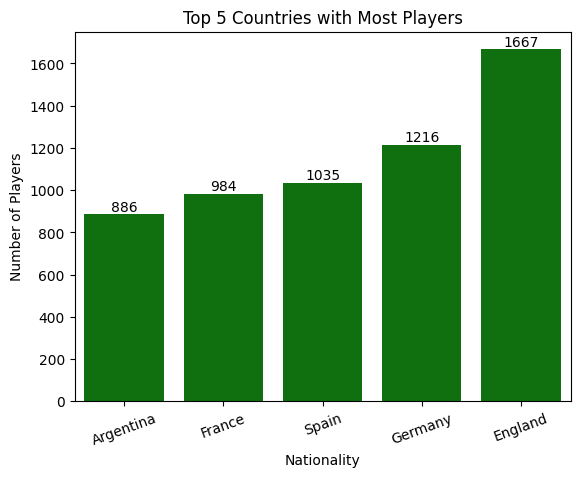

In [ ]:
# 6. Create a bar plot of the top 5 countries with the highest number of players, and fill the bars in green

countries = countries.head(5).sort_values(by = ["player_count"], ascending = True).reset_index()
countries_plot = sns.barplot(data = countries, x = countries.country, y = countries.player_count, palette = ["green"])
countries_plot.set(title = "Top 5 Countries with Most Players")
plt.ylabel("Number of Players")
plt.xlabel("Nationality")
countries_plot.set_xticklabels(rotation = 20, labels = countries.country); # Semicolon prevents ugly output before the graph in .ipynb

for bar in countries_plot.containers:
    countries_plot.bar_label(bar)

In [ ]:
# 7. Display the short name and wages for the top 5 players (by overall)
players_overall = fifa[["short_name", "overall", "wage_eur"]].sort_values(by=["overall"], ascending=False).head(5)
players_overall

,short_name,overall,wage_eur
0,L. Messi,94,565000
1,Cristiano Ronaldo,93,405000
2,Neymar Jr,92,290000
3,J. Oblak,91,125000
4,E. Hazard,91,470000


In [ ]:
# 8. Display the short name and wages for the top 5 players with the highest salaries
players_wages = fifa[["short_name", "overall", "wage_eur"]].sort_values(by=["wage_eur"], ascending=False).head(5).set_index("short_name")
players_wages

,overall,wage_eur
short_name,,
L. Messi,94,565000
E. Hazard,91,470000
Cristiano Ronaldo,93,405000
K. De Bruyne,91,370000
A. Griezmann,89,370000


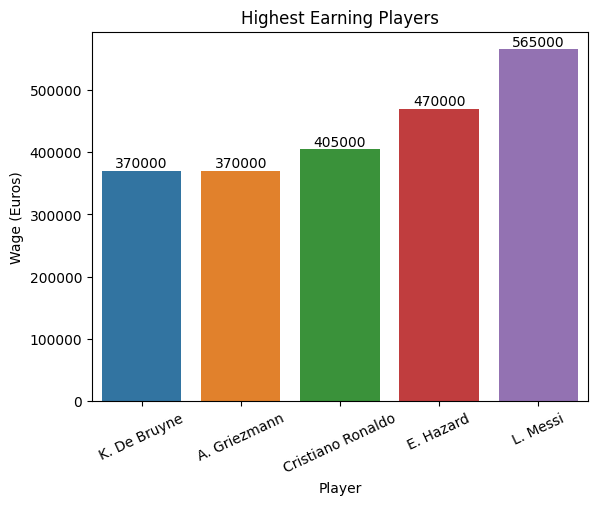

In [ ]:
# 9. Create a bar plot for the previous question.
players_wages = fifa[["short_name", "overall", "wage_eur"]].sort_values(by = ["wage_eur"], ascending = False).head(5)
players_wages = players_wages.sort_values(by = ["wage_eur"], ascending = True)
wage_plot = sns.barplot(data = players_wages, x = players_wages.short_name, y = players_wages.wage_eur)
wage_plot.set(title = "Highest Earning Players")
plt.ylabel("Wage (Euros)")
plt.xlabel("Player")
wage_plot.set_xticklabels(rotation = 25, labels = players_wages.short_name)

for bar in wage_plot.containers:
    wage_plot.bar_label(bar)

In [ ]:
# 10. Show top 10 records for Germany.
germany = fifa[["short_name", "overall", "nationality", "club", "height_cm", "weight_kg", "wage_eur", "age", "dob", "player_positions"]]
germany = germany.where(germany["nationality"] == "Germany").sort_values(by = ["overall"], ascending = False)
germany.head(10)

,short_name,overall,nationality,club,height_cm,weight_kg,wage_eur,age,dob,player_positions
6,M. ter Stegen,90.0,Germany,FC Barcelona,187.0,85.0,250000.0,27.0,1992-04-30,GK
36,T. Kroos,88.0,Germany,Real Madrid,183.0,76.0,330000.0,29.0,1990-01-04,CM
37,M. Reus,88.0,Germany,Borussia Dortmund,180.0,71.0,170000.0,30.0,1989-05-31,"CAM, LM, ST"
31,M. Neuer,88.0,Germany,FC Bayern München,193.0,92.0,155000.0,33.0,1986-03-27,GK
49,M. Hummels,87.0,Germany,Borussia Dortmund,191.0,94.0,130000.0,30.0,1988-12-16,CB
55,L. Sané,86.0,Germany,Manchester City,183.0,75.0,195000.0,23.0,1996-01-11,LW
61,J. Kimmich,86.0,Germany,FC Bayern München,176.0,73.0,125000.0,24.0,1995-02-08,"RB, CM, CDM"
70,T. Müller,86.0,Germany,FC Bayern München,186.0,75.0,170000.0,29.0,1989-09-13,"CAM, RM, RW"
77,N. Süle,85.0,Germany,FC Bayern München,195.0,97.0,115000.0,23.0,1995-09-03,CB
122,B. Leno,84.0,Germany,Arsenal,190.0,83.0,91000.0,27.0,1992-03-04,GK


In [ ]:
# Alt method
germany2 = fifa[["short_name", "overall", "nationality", "club", "height_cm", "weight_kg", "wage_eur", "age", "dob", "player_positions"]]
germany2 = germany2.query("nationality == 'Germany'").sort_values(by = ["overall"], ascending = False).head(10)
germany2

,short_name,overall,nationality,club,height_cm,weight_kg,wage_eur,age,dob,player_positions
6,M. ter Stegen,90,Germany,FC Barcelona,187,85,250000,27,1992-04-30,GK
36,T. Kroos,88,Germany,Real Madrid,183,76,330000,29,1990-01-04,CM
37,M. Reus,88,Germany,Borussia Dortmund,180,71,170000,30,1989-05-31,"CAM, LM, ST"
31,M. Neuer,88,Germany,FC Bayern München,193,92,155000,33,1986-03-27,GK
49,M. Hummels,87,Germany,Borussia Dortmund,191,94,130000,30,1988-12-16,CB
55,L. Sané,86,Germany,Manchester City,183,75,195000,23,1996-01-11,LW
61,J. Kimmich,86,Germany,FC Bayern München,176,73,125000,24,1995-02-08,"RB, CM, CDM"
70,T. Müller,86,Germany,FC Bayern München,186,75,170000,29,1989-09-13,"CAM, RM, RW"
77,N. Süle,85,Germany,FC Bayern München,195,97,115000,23,1995-09-03,CB
122,B. Leno,84,Germany,Arsenal,190,83,91000,27,1992-03-04,GK


In [ ]:
# 11a. Show top 5 records of Germany players who have maximum height.
ger_height = germany[["short_name", "height_cm"]].sort_values(by = ["height_cm"], ascending = False)
ger_height.head(5)

,short_name,height_cm
8016,A. Seydel,199.0
1389,L. Unnerstall,198.0
1217,M. Esser,198.0
7501,B. Röcker,197.0
13635,F. Stritzel,197.0


In [ ]:
# 11b. Show top 5 records of Germany players who have maximum weight.
ger_weight = germany[["short_name", "weight_kg"]].sort_values(by = ["weight_kg"], ascending = False)
ger_weight.head(5)

,short_name,weight_kg
1389,L. Unnerstall,103.0
13576,L. Watkowiak,103.0
518,R. Fährmann,98.0
13201,D. Smarsch,97.0
1217,M. Esser,97.0


In [ ]:
# 11c. Show top 5 records of Germany players who have maximum wages.
ger_wage = germany[["short_name", "wage_eur"]].sort_values(by = ["wage_eur"], ascending = False)
ger_wage.head(5)

,short_name,wage_eur
36,T. Kroos,330000.0
6,M. ter Stegen,250000.0
55,L. Sané,195000.0
146,I. Gündoğan,180000.0
37,M. Reus,170000.0


In [ ]:
# 12. Show short name and wages of the top 5 Germany players.
top_ger_wage = germany[["short_name", "wage_eur", "overall"]].sort_values(by = ["overall"], ascending = False)
top_ger_wage.head(5)

,short_name,wage_eur,overall
6,M. ter Stegen,250000.0,90.0
37,M. Reus,170000.0,88.0
31,M. Neuer,155000.0,88.0
36,T. Kroos,330000.0,88.0
49,M. Hummels,130000.0,87.0


In [ ]:
# 13. Show top 5 players who have the best shooting skills among all the players with short names.
shooting = fifa[["short_name", "shooting", "nationality", "club", "overall", "height_cm", "weight_kg", "wage_eur", "age", "dob", "player_positions"]]
shooting.sort_values(by = ["shooting"], ascending = False).head(5)

,short_name,shooting,nationality,club,overall,height_cm,weight_kg,wage_eur,age,dob,player_positions
1,Cristiano Ronaldo,93.0,Portugal,Juventus,93,187,83,405000,34,1985-02-05,"ST, LW"
0,L. Messi,92.0,Argentina,FC Barcelona,94,170,72,565000,32,1987-06-24,"RW, CF, ST"
12,H. Kane,91.0,England,Tottenham Hotspur,89,188,89,220000,25,1993-07-28,ST
17,S. Agüero,90.0,Argentina,Manchester City,89,173,70,300000,31,1988-06-02,ST
205,F. Quagliarella,89.0,Italy,Sampdoria,83,180,79,46000,36,1983-01-31,ST


In [ ]:
# 14. Show top 5 players records (short name, defending, nationality, and club) that have awesome defending skills.
defending = fifa[["short_name", "defending", "nationality", "club", "overall", "height_cm", "weight_kg", "wage_eur", "age", "dob", "player_positions"]]
defending.sort_values(by = ["defending"], ascending = False).head(5)

,short_name,defending,nationality,club,overall,height_cm,weight_kg,wage_eur,age,dob,player_positions
16,G. Chiellini,90.0,Italy,Juventus,89,187,85,215000,34,1984-08-14,CB
7,V. van Dijk,90.0,Netherlands,Liverpool,90,193,92,200000,27,1991-07-08,CB
11,K. Koulibaly,89.0,Senegal,Napoli,89,187,89,150000,28,1991-06-20,CB
35,D. Godín,89.0,Uruguay,Inter,88,187,78,135000,33,1986-02-16,CB
49,M. Hummels,89.0,Germany,Borussia Dortmund,87,191,94,130000,30,1988-12-16,CB


In [ ]:
# 15. Show wages records of top 5 players of the 'Real Madrid' team.
real_madrid = fifa[["short_name", "overall", "nationality", "club", "shooting", "defending", "height_cm", "weight_kg", "wage_eur", "age", "dob", "player_positions"]]
real_madrid = real_madrid.where(real_madrid["club"]=="Real Madrid").sort_values(by = ["wage_eur"], ascending = False)
real_madrid[["short_name", "wage_eur", "club", "player_positions"]].head(5)

,short_name,wage_eur,club,player_positions
4,E. Hazard,470000.0,Real Madrid,"LW, CF"
8,L. Modrić,340000.0,Real Madrid,CM
36,T. Kroos,330000.0,Real Madrid,CM
18,Sergio Ramos,300000.0,Real Madrid,CB
46,K. Benzema,285000.0,Real Madrid,"CF, ST"


In [ ]:
# 16. Show shooting records of the top 5 players of the 'Real Madrid' team.
real_madrid[["short_name", "shooting", "club", "player_positions"]].sort_values(by = ["shooting"], ascending = False).head(5)

,short_name,shooting,club,player_positions
100,G. Bale,87.0,Real Madrid,"RW, LW, ST"
106,J. Rodríguez,86.0,Real Madrid,"CAM, CM, RM"
4,E. Hazard,83.0,Real Madrid,"LW, CF"
46,K. Benzema,82.0,Real Madrid,"CF, ST"
161,L. Jović,82.0,Real Madrid,ST


In [ ]:
# 17. Show defending records of the top 5 players of the 'Real Madrid' team.
real_madrid[["short_name", "defending", "club", "player_positions"]].sort_values(by = ["defending"], ascending = False).head(5)

,short_name,defending,club,player_positions
18,Sergio Ramos,87.0,Real Madrid,CB
42,Casemiro,85.0,Real Madrid,CDM
76,R. Varane,85.0,Real Madrid,CB
94,Carvajal,82.0,Real Madrid,RB
277,Nacho Fernández,81.0,Real Madrid,"CB, LB, RB"


In [ ]:
# 18. Show nationality records of the top 5 players of the 'Real Madrid' team.
real_madrid[["short_name", "overall", "nationality", "club", "player_positions"]].sort_values(by = ["overall"], ascending = False).head(5)

,short_name,overall,nationality,club,player_positions
4,E. Hazard,91.0,Belgium,Real Madrid,"LW, CF"
8,L. Modrić,90.0,Croatia,Real Madrid,CM
18,Sergio Ramos,89.0,Spain,Real Madrid,CB
36,T. Kroos,88.0,Germany,Real Madrid,CM
28,T. Courtois,88.0,Belgium,Real Madrid,GK


# **Simulation Extension**

*What if I told you this was all a simulation?*

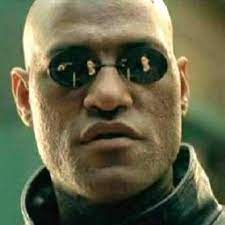

In [ ]:
# Players typically fall into normal, lean, and stocky body types.
# However, 6 elite athletes have their own body type: Messi, Ronaldo, Neymar, Courtois, Shaqiri, and Akinfenwa. Also PLAYER_BODY_TYPE_25.
fifa.body_type.value_counts()

Normal                 10750
Lean                    6505
Stocky                  1016
Messi                      1
C. Ronaldo                 1
Neymar                     1
PLAYER_BODY_TYPE_25        1
Courtois                   1
Shaqiri                    1
Akinfenwa                  1
Name: body_type, dtype: int64

In [ ]:
# Here we find that M. Salah is the one with the "PLAYER_BODY_TYPE_25" body type. Good for him.
# My guess is these are famous soccer players that were willing to be in the game and PLAYER_BODY_TYPE_25 might be a custom character.
special_body_type = fifa[["short_name", "long_name", "body_type"]]
special_body_type = special_body_type.where(special_body_type.body_type != "Lean").where(special_body_type.body_type != "Normal").where(special_body_type.body_type != "Stocky")
special_body_type.dropna()

,short_name,long_name,body_type
0,L. Messi,Lionel Andrés Messi Cuccittini,Messi
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,C. Ronaldo
2,Neymar Jr,Neymar da Silva Santos Junior,Neymar
9,M. Salah,Mohamed Salah Ghaly,PLAYER_BODY_TYPE_25
28,T. Courtois,Thibaut Courtois,Courtois
313,X. Shaqiri,Xherdan Shaqiri,Shaqiri
10693,A. Akinfenwa,Adebayo Akinfenwa,Akinfenwa


In [ ]:
# Alt method
special_body_type2 = fifa[["short_name", "long_name", "body_type"]]
special_body_type2 = special_body_type2.query("body_type != 'Lean' and body_type != 'Normal' and body_type != 'Stocky'")
special_body_type2

,short_name,long_name,body_type
0,L. Messi,Lionel Andrés Messi Cuccittini,Messi
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,C. Ronaldo
2,Neymar Jr,Neymar da Silva Santos Junior,Neymar
9,M. Salah,Mohamed Salah Ghaly,PLAYER_BODY_TYPE_25
28,T. Courtois,Thibaut Courtois,Courtois
313,X. Shaqiri,Xherdan Shaqiri,Shaqiri
10693,A. Akinfenwa,Adebayo Akinfenwa,Akinfenwa


In [ ]:
# Checked to see if maybe there was a real "M. Salah" and a player-made "M. Salah". Only one appears.
salah = fifa[["short_name", "long_name", "body_type"]].where(fifa["short_name"] == "M. Salah")
salah.dropna()

,short_name,long_name,body_type
9,M. Salah,Mohamed Salah Ghaly,PLAYER_BODY_TYPE_25


In [ ]:
# Alt method
salah2 = fifa[["short_name", "long_name", "body_type"]].query("short_name == 'M. Salah'")
salah2

,short_name,long_name,body_type
9,M. Salah,Mohamed Salah Ghaly,PLAYER_BODY_TYPE_25


In [ ]:
# The "PLAYER_BODY_TYPE_25" body type and the "real_faces" column made me question if this data describes irl FIFA data or video game FIFA data.
fifa.real_face.value_counts()

No     16310
Yes     1968
Name: real_face, dtype: int64

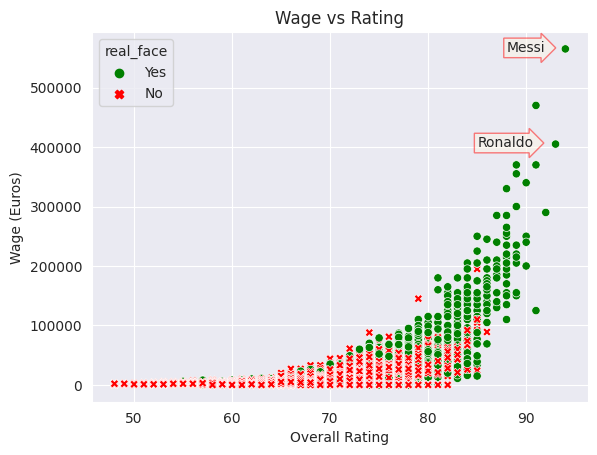

In [ ]:
# I figured if this data represents a FIFA game, players with a "real_face" would probably be the more famous ones.
# I also thought that famous soccer players would probably earn more and/or have a higher overall rating.
real_faces = sns.scatterplot(data = fifa, x = "overall", y = "wage_eur", hue = "real_face", palette = ["green", "red"], style = "real_face")

# Labels and styling
plt.ylabel("Wage (Euros)")
plt.xlabel("Overall Rating")
real_faces.set_title("Wage vs Rating")
sns.set_style("darkgrid")

# Add arrows for Messi and Ronaldo
plt.text(88, 560000, "Messi", bbox = {"facecolor": "oldlace", "alpha": 0.5, "boxstyle": "rarrow, pad = 0.2", "ec": "red"})
plt.text(85, 400000, "Ronaldo", bbox = {"facecolor": "oldlace", "alpha": 0.5, "boxstyle": "rarrow, pad = 0.2", "ec": "red"});